# Model building

We will finally build our machine learnig model, utilising the engineered data and the pre-selected features.

## Imports

In [79]:
# to handle datasets
import pandas as pd 
import numpy as np 

# for plotting 
import matplotlib.pyplot as plt 

# to build the model 
from sklearn.linear_model import Lasso 

# to evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score 
from math import sqrt 

# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


## Gathering data

In [80]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,12.211060,0.0,0.0,0.0
1,657,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,11.887931,0.0,0.0,0.0
2,46,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,12.675764,0.0,0.0,0.0
3,1349,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,12.278393,1.0,0.0,0.0
4,56,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,12.103486,0.0,0.0,0.0


In [81]:
X_train['LotFrontage']

0       0.461171
1       0.456066
2       0.394699
3       0.388581
4       0.577658
          ...   
1309    0.504203
1310    0.388581
1311    0.434909
1312    0.388581
1313    0.376033
Name: LotFrontage, Length: 1314, dtype: float64

In [82]:
# capture the target (remember that is log transformed)
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

## Load pre-selected features

In [83]:
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

# We will add one additional feature to the ones we selected in the prvious notebook: LotFrontage
# because it needs key feature engineering steps that we want to
# discuss further during the deployment part of the course. 

features = features + ['LotFrontage']
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [84]:
X_train = X_train[features]
X_test = X_test[features]

## Regularised linear regression: Lasso

In [85]:
lin_model = Lasso(alpha=0.005, random_state=0)

# train the model 
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

## Evaluate the model

In [86]:
# Remember that we log trasnformed the output (SalePrice)

# In order to get the true performance of the Lasso
# we need to transform both the target and hte predictions

# We will evaluate performance using the mean squared error and the root of the mean squared error and r2

# make predictiosn for train set

pred = lin_model.predict(X_train)

# Determine ms and rmse

print('train mse: {}'.format(
    int(mean_squared_error(np.exp(y_train), np.exp(pred)))
    )
)

print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))
    )
)

print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))
    )
)


# make predictions for test set

pred = lin_model.predict(X_test)

# determine mse and rmse

print('test mse: {}'.format(
    int(mean_squared_error(np.exp(y_test), np.exp(pred)))
    )
)

print('test rmse: {}'.format(
    int(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))
    )
)

print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))
    )
)

train mse: 1087435415
train rmse: 32976
train r2: 0.8258384535431154
test mse: 1405259552
test rmse: 37486
test r2: 0.7955128088451103


In [87]:
print('Average house price: ', int(np.exp(y_train).median()))

Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

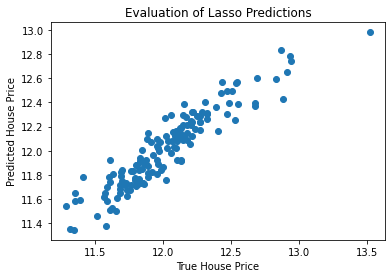

In [88]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

<AxesSubplot:>

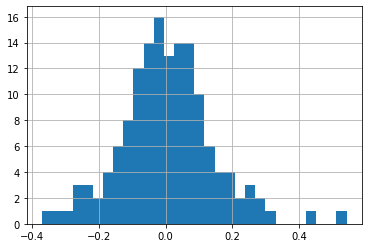

In [89]:
# let's evaluate the distrubtion of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=30)

In [90]:
# The distribution of the errors follows quite closely a gaussian distribution. That suggest that our model is doing a good job as well.